# **Data Collection Notebook**

## Objectives

* Fetch data from Kaggle and save it as raw data.
* Inspect the data and save it under outputs/datasets/collection

## Inputs

*   Kaggle JSON file - the authentication token.

## Outputs

* Generate Dataset: outputs/datasets/collection/TelcoCustomerChurn.csv

## Additional Comments


* In the workplace, **projects are not done using Kaggle data**, but instead, the data comes from multiple data sources that may be hosted internally (like in a data warehouse) or outside your company. For this project learning context, we are fetching the data from Kaggle.

* Another aspect is that in the workplace, the **data has never been pushed to a public repository** due to security reasons. Just for this project learning context, we are hosting the data in a public repo.


---

# Change working directory

We need to change the working directory from its current folder to its parent folder
* We access the current directory with os.getcwd()

In [ ]:
import os
current_dir = os.getcwd()
current_dir

We want to make the parent of the current directory the new current directory.
* os.path.dirname() gets the parent directory
* os.chir() defines the new current directory

In [ ]:
os.chdir(os.path.dirname(current_dir))
print("You set a new current directory")

Confirm the new current directory

In [ ]:
current_dir = os.getcwd()
current_dir

# Fetch data from Kaggle

Install Kaggle package to fetch data

In [ ]:
! pip install kaggle==1.5.12

In the Data Collection Section notebook we studied how to download a **JSON file (authentication token)** from Kaggle. That is needed to authenticate Kaggle to download data in this session.
* You will need **kaggle.json** available
* In case you don't have it, please refer to the Data Collection > Data Collection Unit 1: Getting Your Data notebook.


The next step is to manually drag the kaggle.json into the session

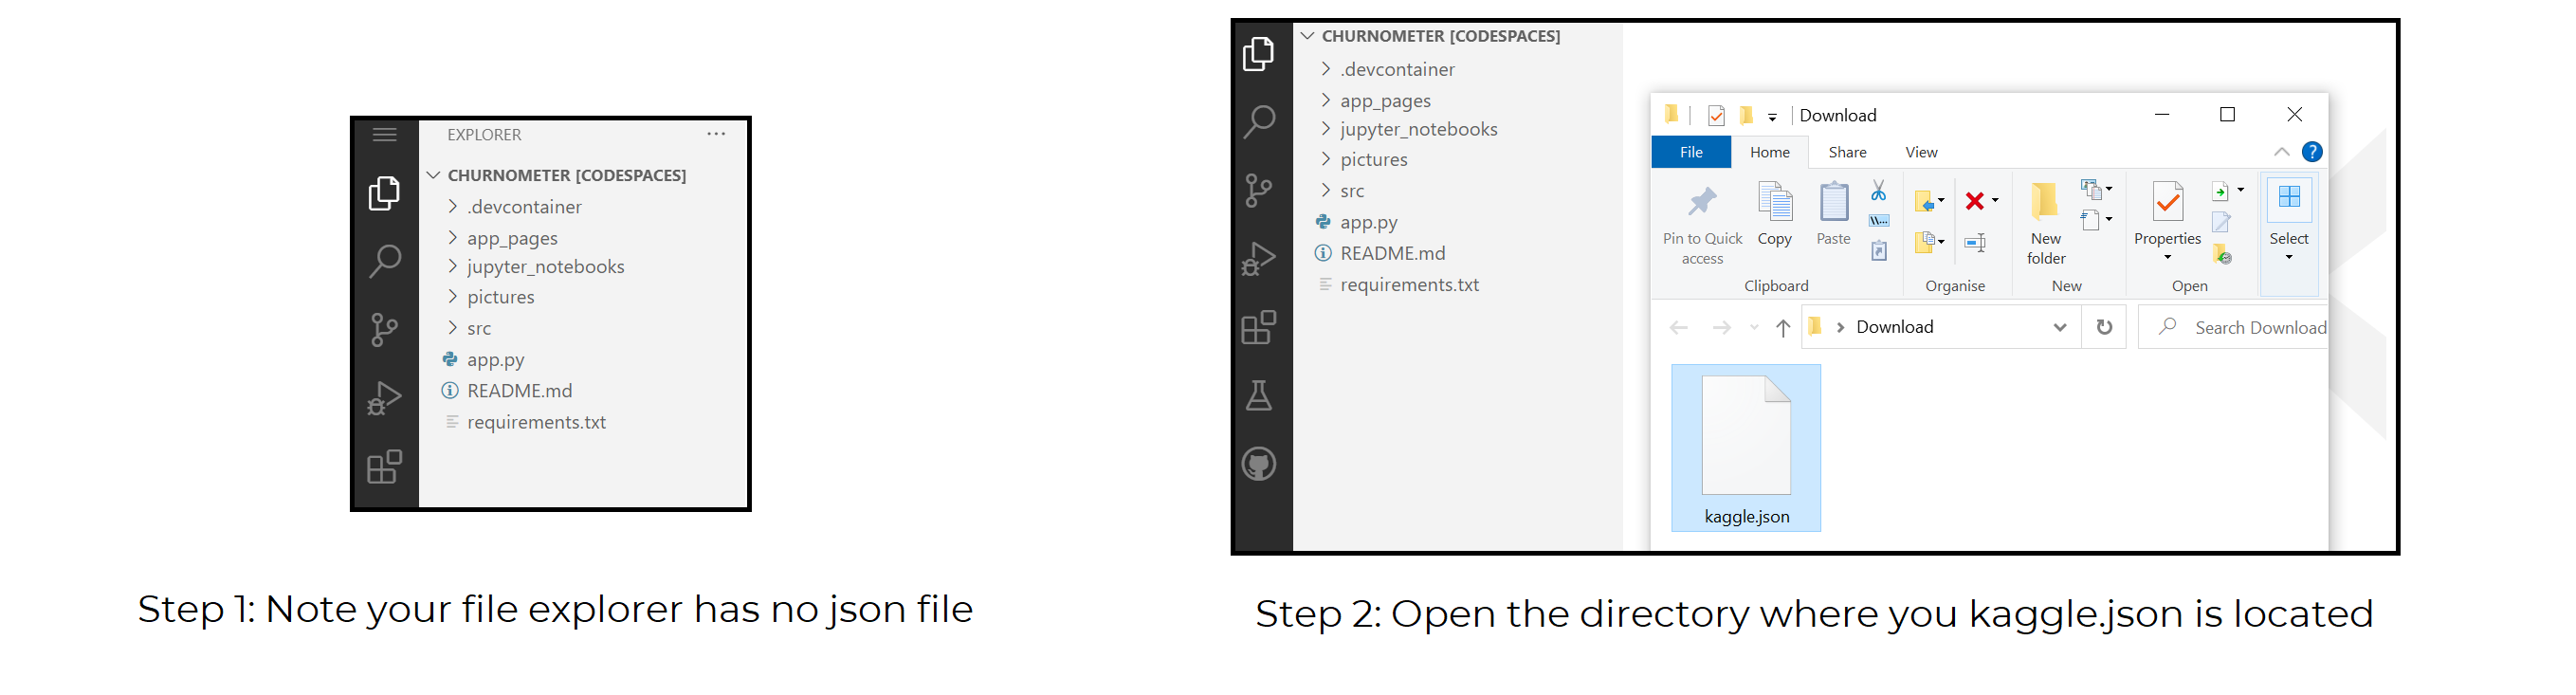

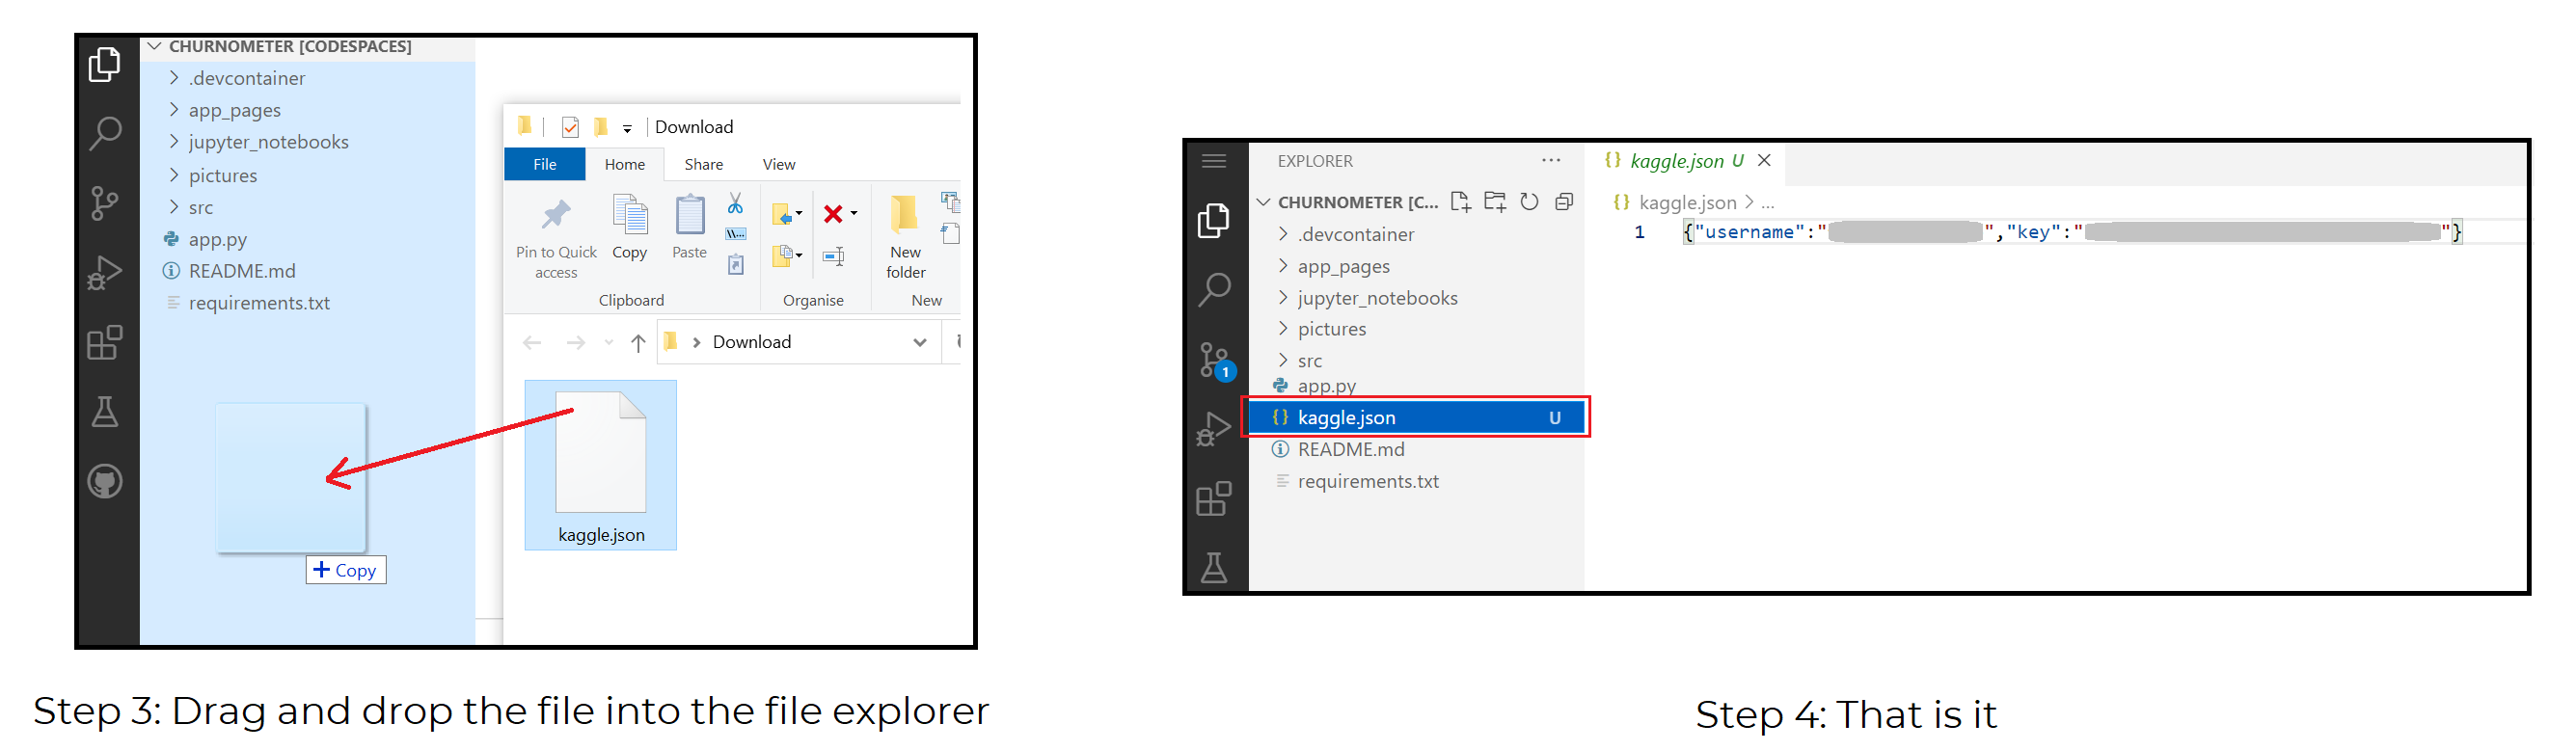

Once you do that run the cell below, so the token is recognized in the session

In [ ]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = os.getcwd()
! chmod 600 kaggle.json

We are using the following [Kaggle URL](https://www.kaggle.com/codeinstitute/telecom-churn-dataset)

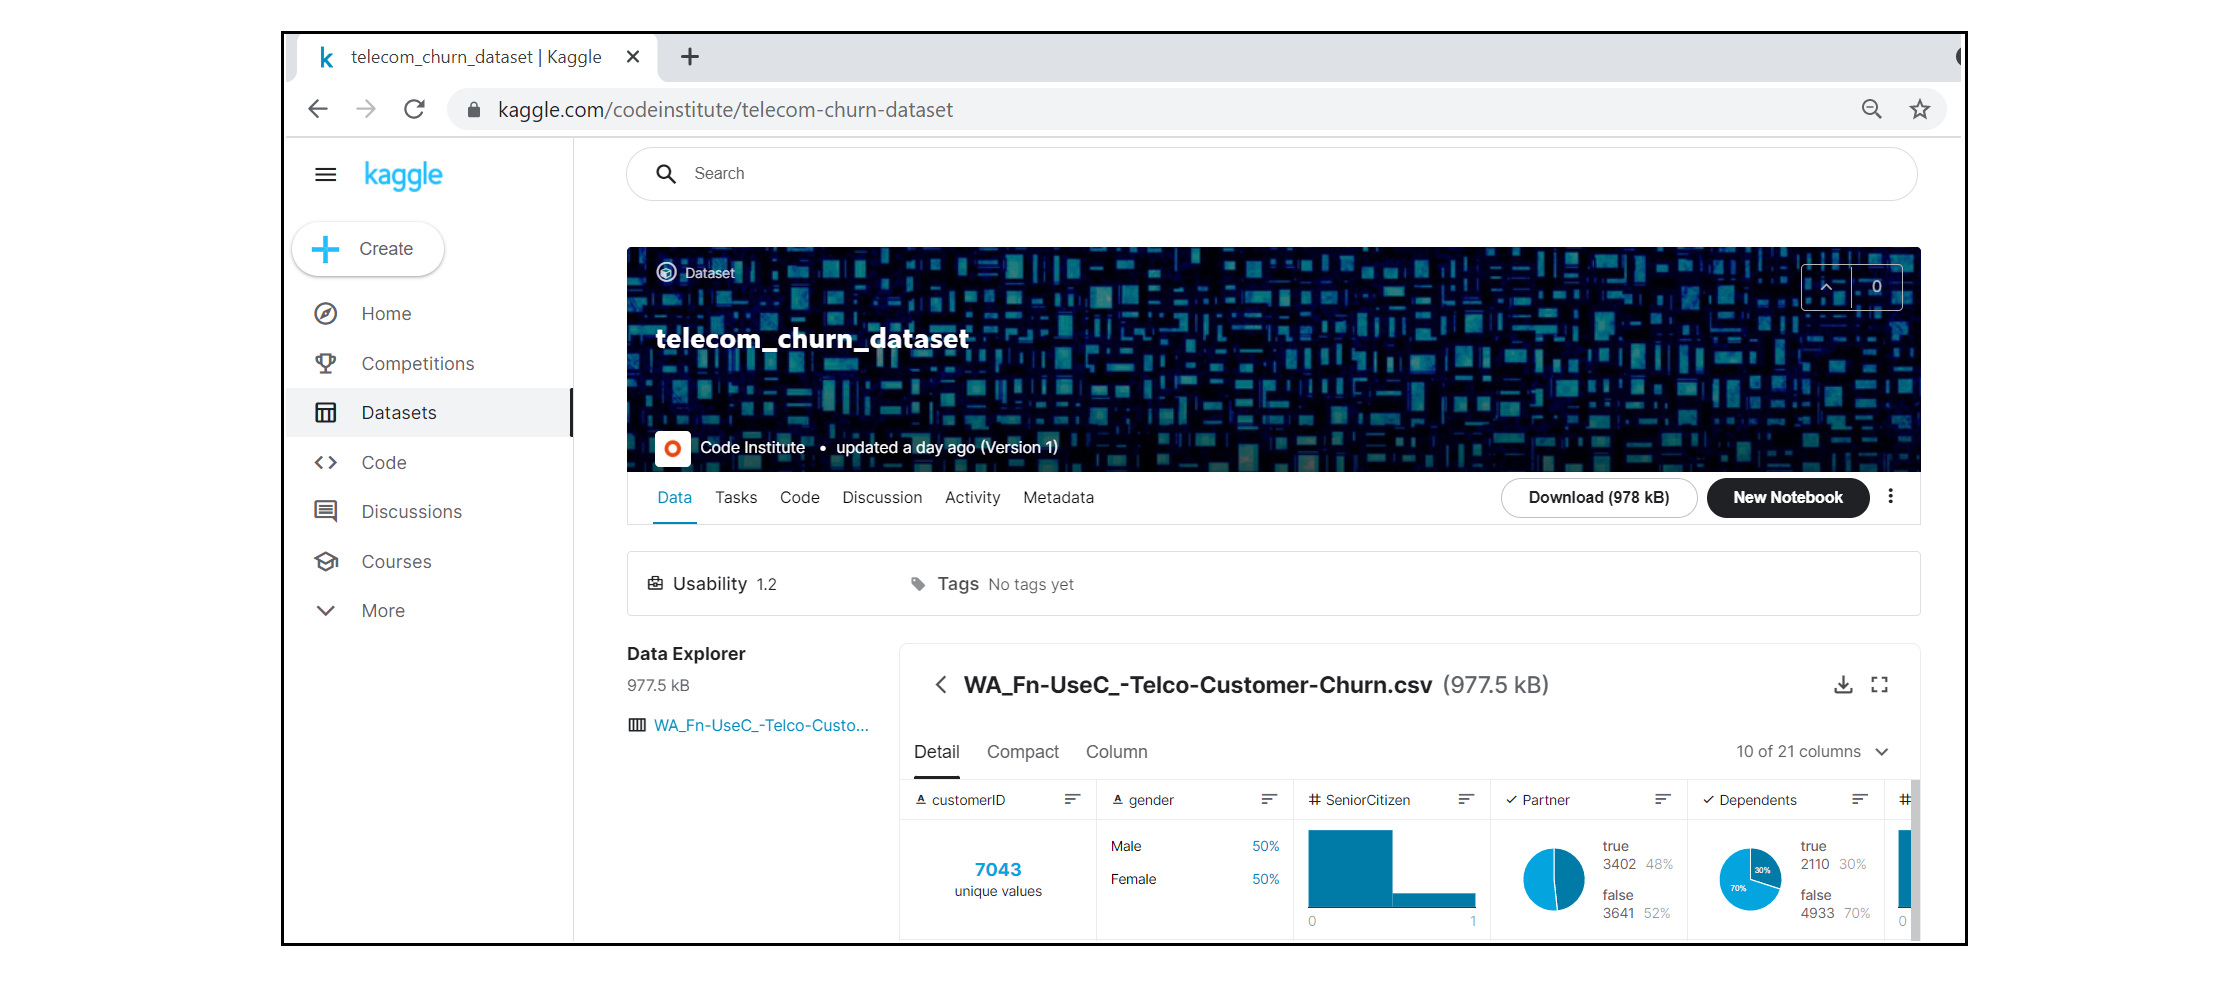

Get the dataset path from the Kaggle url
* When you are viewing the dataset at Kaggle, check what is after https://www.kaggle.com/ .

Define the Kaggle dataset, and destination folder and download it.

In [ ]:
KaggleDatasetPath = "codeinstitute/telecom-churn-dataset"
DestinationFolder = "inputs/datasets/raw"   
! kaggle datasets download -d {KaggleDatasetPath} -p {DestinationFolder}

Unzip the downloaded file, delete the zip file and delete the kaggle.json file

In [ ]:
! unzip {DestinationFolder}/*.zip -d {DestinationFolder} \
  && rm {DestinationFolder}/*.zip \
  && rm kaggle.json

---

# Load and Inspect Kaggle data

In [ ]:
import pandas as pd
df = pd.read_csv(f"inputs/datasets/raw/WA_Fn-UseC_-Telco-Customer-Churn.csv")
df.head()

DataFrame Summary

In [ ]:
df.info()

We want to check if there are duplicated `customerID`: There are not.

In [ ]:
df[df.duplicated(subset=['customerID'])]

Converting `TotalCharges` to numeric

In [ ]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'] ,errors='coerce')

Check `TotalCharges` data type

In [ ]:
df['TotalCharges'].dtype

We noticed `Churn` is a categorical variable: Yes or No. We will replace/convert it to an integer as the ML model requires numeric variables. 

In [ ]:
df['Churn'].unique()

In [ ]:
df['Churn'] = df['Churn'].replace({"Yes":1, "No":0})

Check the `Churn` data type.

In [ ]:
df['Churn'].dtype

# Push files to Repo

In [ ]:
import os
try:
  os.makedirs(name='outputs/datasets/collection') # create outputs/datasets/collection folder
except Exception as e:
  print(e)

df.to_csv(f"outputs/datasets/collection/TelcoCustomerChurn.csv",index=False)

Good job! Clear the cell's outputs and move on to the next notebook.

Well done! You can now push the changes to your GitHub Repo, using the Git commands (git add, git commit, git push)